In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('resources/data/laptop_data.csv')

In [4]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [6]:
print(df['Feature'][3])

AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty


Extract the details using regex

In [7]:
import re

In [8]:
#Extract processor info

exp = r'(?i)(AMD|Intel|Apple|Qualcomm)[a-z0-9 ]*Processor'
df['Processor'] = df.Feature.apply(lambda x: re.search(exp,x).group() if(re.search(exp,x)) else None)

In [9]:
#Extract ram

regex = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.search(regex, x).group() if(re.search(regex,x)) else None)

In [10]:
# OS 

regex = r'(Windows (?:10|11)|Mac OS|Linux|DOS|Chrome)[\s\w]*Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.search(regex, x).group() if(re.search(regex,x)) else None)

In [11]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD|EMMC)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex,x))


In [12]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.search(regex, x).group() if(re.search(regex,x)) else None)

In [13]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[256 GB SSD],Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,[512 GB SSD],HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],ASUS


In [14]:
df.shape

(720, 9)

In [15]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[256 GB SSD],Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,[512 GB SSD],HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],ASUS


In [16]:
df['MRP'] = df['MRP'].astype(str).str.replace('₹','').str.replace(',','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.8+ KB


In [17]:
#CONVERTING MRP INTO INT TYPE, AS MRP IS NOT IN FLOAT TYPE
df['MRP'] = df['MRP'].apply(lambda x: int(round(x)))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    int64  
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 50.8+ KB


In [18]:
df = df.drop(['Rating'], axis=1)
df

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[256 GB SSD],Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,[512 GB SSD],HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],ASUS
...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,[],ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,[512 GB SSD],Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,[1 TB SSD],ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,[512 GB SSD],ASUS


#### HANDLING MISSING VALUES

In [19]:
df.isnull().sum()

Product      0
MRP          0
Feature      0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
dtype: int64

In [20]:
df = df.dropna(how='any',axis=0)

In [21]:
df.shape

(720, 8)

#### DATA CLEANING

In [22]:
df['Processor'].value_counts()

Intel Core i5 Processor                   157
Intel Core i3 Processor                   133
AMD Ryzen 9 Octa Core Processor            87
AMD Ryzen 7 Octa Core Processor            80
Intel Core i7 Processor                    56
AMD Ryzen 5 Hexa Core Processor            52
AMD Ryzen 3 Dual Core Processor            43
AMD Ryzen 5 Quad Core Processor            37
Intel Celeron Dual Core Processor          20
Intel Core i9 Processor                    11
Apple M1 Processor                          7
Apple M1 Pro Processor                      6
Apple M2 Processor                          5
AMD Ryzen 3 Quad Core Processor             4
Intel Celeron Quad Core Processor           3
Intel Pentium Silver Processor              3
Intel Pentium Quad Core Processor           3
Intel Evo Core i5 Processor                 2
AMD Athlon Dual Core Processor              2
Intel OptaneIntel Core i3 Processor         2
AMD Ryzen 5 Dual Core Processor             2
AMD Ryzen 7 Quad Core Processor   

Processor column

In [23]:
df.loc[:,'Processor']=df['Processor'].replace({
                                            'Intel Pentium Silver Processor':   'Intel Core i5 Processor',         
                                            'Intel Pentium Quad Core Processor':  'Intel Core i5 Processor'  ,    
                                            'Intel Celeron Quad Core Processor' :     'Intel Core i5 Processor',
                                            'AMD Ryzen 5 Dual Core Processor'   :     'AMD Ryzen 5 Quad Core Processor',
                                            'Intel Evo Core i5 Processor':          'Intel Core i5 Processor',
                                            'Intel OptaneIntel Core i3 Processor':     'Intel Core i3 Processor',
                                            'AMD Athlon Dual Core Processor':           'AMD Ryzen 3 Dual Core Processor',
                                            'Apple M1 Max Processor':                    'Apple M1 Processor',
                                            'AMD Ryzen 7 Quad Core Processor':          'AMD Ryzen 7 Octa Core Processor',
                                            'AMD Dual Core Processor':                  'AMD Ryzen 3 Dual Core Processor',
                                            'AMD Ryzen 3 Hexa Core Processor':          'AMD Ryzen 3 Dual Core Processor'})

In [24]:
df['Processor'].value_counts()

Intel Core i5 Processor                   168
Intel Core i3 Processor                   135
AMD Ryzen 9 Octa Core Processor            87
AMD Ryzen 7 Octa Core Processor            81
Intel Core i7 Processor                    56
AMD Ryzen 5 Hexa Core Processor            52
AMD Ryzen 3 Dual Core Processor            47
AMD Ryzen 5 Quad Core Processor            39
Intel Celeron Dual Core Processor          20
Intel Core i9 Processor                    11
Apple M1 Processor                          8
Apple M1 Pro Processor                      6
Apple M2 Processor                          5
AMD Ryzen 3 Quad Core Processor             4
Qualcomm Snapdragon 7c Gen 2 Processor      1
Name: Processor, dtype: int64

RAM COLUMN

In [25]:
df['RAM'].value_counts()

8 GB DDR4 RAM                                                                                377
16 GB DDR4 RAM                                                                               153
16 GB DDR5 RAM                                                                                77
4 GB DDR4 RAM                                                                                 26
8 GB LPDDR4X RAM                                                                              16
16 GB LPDDR4X RAM                                                                             16
32 GB DDR5 RAM                                                                                11
16 GB LPDDR5 RAM                                                                               9
4 GB LPDDR4 RAM                                                                                7
16 GB Unified Memory RAM                                                                       6
8 GB Unified Memory RAM       

In [26]:
df.loc[:,'RAM']=df['RAM'].replace({   '16 GB Unified Memory RAM':'16 GB DDR4 RAM','8 GB Unified Memory RAM':'8 GB DDR4 RAM',
                                      '8 GB DDR5 RAM': '8 GB DDR4 RAM','32 GB DDR4 RAM':'32 GB DDR5 RAM',
                                       '4 GB LPDDR4 RAM':'4 GB DDR4 RAM','4 GB LPDDR4X RAM':'4 GB DDR4 RAM','16 GB LPDDR3 RAM':'16 GB LPDDR4X RAM',
                                         '32 GB LPDDR4X RAM':'32 GB DDR5 RAM','16 GB LPDDR4 RAM':'16 GB LPDDR4X RAM','32 GB Unified Memory RAM':'16 GB LPDDR4X RAM',
                            '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM':'16 GB DDR4 RAM',
                                              
                                           })

In [27]:
df['RAM'].value_counts()

8 GB DDR4 RAM        386
16 GB DDR4 RAM       160
16 GB DDR5 RAM        77
4 GB DDR4 RAM         37
16 GB LPDDR4X RAM     19
8 GB LPDDR4X RAM      16
32 GB DDR5 RAM        16
16 GB LPDDR5 RAM       9
Name: RAM, dtype: int64

OS COLUMN

In [28]:
df['OS'].value_counts()

Windows 11 Operating System                                                                                560
Windows 10 Operating System                                                                                128
Mac OS Operating System                                                                                     19
Chrome Operating System                                                                                      7
DOS Operating System                                                                                         4
Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System      1
Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System      1
Name: OS, dtype: int64

In [29]:
df.loc[:,'OS']=df['OS'].replace({ 'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System':'Windows 11 Operating System',
                                     'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System' :'Windows 10 Operating System' })

In [30]:
df['OS'].value_counts()

Windows 11 Operating System    561
Windows 10 Operating System    129
Mac OS Operating System         19
Chrome Operating System          7
DOS Operating System             4
Name: OS, dtype: int64

Storage Column

In [31]:
df['Storage']=df['Storage'].apply(lambda x: ''.join(x))
df['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [32]:
df[df['Storage']=='']

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,Qualcomm Snapdragon 7c Gen 2 Processor,4 GB DDR4 RAM,Windows 11 Operating System,,SAMSUNG
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Chrome Operating System,,Lenovo
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Chrome Operating System,,Lenovo
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Chrome Operating System,,ASUS
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Chrome Operating System,,ASUS
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Windows 11 Operating System,,ASUS
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Windows 11 Operating System,,ASUS
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Chrome Operating System,,Lenovo
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Chrome Operating System,,ASUS
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,Chrome Operating System,,ASUS


In [33]:
print(df['Product'][83])
print(df['Product'][89])
print(df['Product'][96])
print(df['Product'][345])
print(df['Product'][509])
print(df['Product'][544])
print(df['Product'][559])
print(df['Product'][695])
print(df['Product'][632])
print(df['Product'][715])

SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (4 GB/128 GB EMMC Storage/Windows 11 Home) NP340XLA-KA1IN...
Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...
Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...
ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/32 GB EMMC Storage/Chrome OS) C214MA-BU0704 Chrom...
ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chrom...
ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ011W Thin and L...
ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ012W Thin and L...
ASUS Chromebook Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C423NA-EC0521 Chromebook
Lenovo IdeaPad Flex 3 Chromebook Celeron Dual Core - (4 GB/128 GB EMMC Storage/Chrome OS) CB 11IJL6 Ch...
ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64

In [34]:
### MOST OF THE VALUES ARE 64 gb emmc storage type, replace missing rows with that

df['Storage']=df['Storage'].replace('','64 GB EMMC')

In [35]:
df['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
64 GB EMMC                       10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [36]:
df.loc[:,'Storage']=df['Storage'].replace({ '1 TB HDD512 GB SSD':'1 TB SSD',
                                     '128 GB SSD1 TB HDD128 GB SSD' :'1 TB HDD256 GB SSD',
                                         '256 GB HDD256 GB SSD':'512 GB SSD' })

In [37]:
df['Storage'].value_counts()

512 GB SSD            376
1 TB SSD              178
256 GB SSD             98
1 TB HDD256 GB SSD     28
1 TB HDD               17
64 GB EMMC             10
2 TB SSD                7
128 GB SSD              6
Name: Storage, dtype: int64

BRAND COLUMN

In [38]:
df['Brand'].value_counts()

ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    720 non-null    object
 1   MRP        720 non-null    int64 
 2   Feature    720 non-null    object
 3   Processor  720 non-null    object
 4   RAM        720 non-null    object
 5   OS         720 non-null    object
 6   Storage    720 non-null    object
 7   Brand      720 non-null    object
dtypes: int64(1), object(7)
memory usage: 45.1+ KB


In [40]:
#Extract Ram size

regex=r'[\d]+\sGB'
df['RAM_SIZE']=df['RAM'].apply(lambda x: re.findall(regex,x))
df['RAM_SIZE']=df['RAM_SIZE'].apply(lambda x: ''.join(x))
df['RAM_SIZE'].value_counts()

8 GB     402
16 GB    265
4 GB      37
32 GB     16
Name: RAM_SIZE, dtype: int64

In [41]:
#RAM TYPE 

df['RAM_type'] = df['RAM'].apply(lambda x: re.search(r'GB\s([\w\s]+)', x).group(1))
df['RAM_type'].value_counts()

DDR4 RAM       583
DDR5 RAM        93
LPDDR4X RAM     35
LPDDR5 RAM       9
Name: RAM_type, dtype: int64

In [42]:
# display size

regex = re.compile(r'[0-9.]+\sinch')
df['Display_Size'] = df['Feature'].apply(lambda x: regex.search(x).group(0) if(regex.search(x)) else None)
df.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand,RAM_SIZE,RAM_type,Display_Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo,8 GB,DDR4 RAM,14 inch
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,8 GB,DDR4 RAM,15.6 inch
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,8 GB,DDR4 RAM,15.6 inch
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP,8 GB,DDR4 RAM,15.6 inch
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,8 GB,DDR4 RAM,15.6 inch


In [43]:
df.Display_Size=df.Display_Size.str.replace('inch', '')
df.Display_Size=df.Display_Size.str.replace('Inch', '')
df['Display_Size'] = df['Display_Size'].astype(float)

In [44]:
## convert ramsize,display,size,storage into string format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       720 non-null    object 
 1   MRP           720 non-null    int64  
 2   Feature       720 non-null    object 
 3   Processor     720 non-null    object 
 4   RAM           720 non-null    object 
 5   OS            720 non-null    object 
 6   Storage       720 non-null    object 
 7   Brand         720 non-null    object 
 8   RAM_SIZE      720 non-null    object 
 9   RAM_type      720 non-null    object 
 10  Display_Size  510 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 62.0+ KB


In [45]:
df.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand,RAM_SIZE,RAM_type,Display_Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo,8 GB,DDR4 RAM,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,8 GB,DDR4 RAM,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,8 GB,DDR4 RAM,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP,8 GB,DDR4 RAM,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,8 GB,DDR4 RAM,15.6


In [46]:
df.isnull().sum()

Product           0
MRP               0
Feature           0
Processor         0
RAM               0
OS                0
Storage           0
Brand             0
RAM_SIZE          0
RAM_type          0
Display_Size    210
dtype: int64

In [47]:
df['Display_Size'].max()

206015.6

In [48]:
df['Display_Size'].min()

11.6

In [49]:
# Filter the DataFrame to exclude outliers
df = df[(df['Display_Size'] >=11.0 ) & (df['Display_Size'] <= 30.0)]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 719
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       509 non-null    object 
 1   MRP           509 non-null    int64  
 2   Feature       509 non-null    object 
 3   Processor     509 non-null    object 
 4   RAM           509 non-null    object 
 5   OS            509 non-null    object 
 6   Storage       509 non-null    object 
 7   Brand         509 non-null    object 
 8   RAM_SIZE      509 non-null    object 
 9   RAM_type      509 non-null    object 
 10  Display_Size  509 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 47.7+ KB


In [51]:
### Drop unnecessary columns

In [52]:
df=df.drop(columns=['Product','Feature','RAM'],axis=1)
df

,MRP,Processor,OS,Storage,Brand,RAM_SIZE,RAM_type,Display_Size
0,36990,Intel Core i3 Processor,Windows 11 Operating System,256 GB SSD,Lenovo,8 GB,DDR4 RAM,14.0
1,39990,Intel Core i3 Processor,Windows 11 Operating System,512 GB SSD,Lenovo,8 GB,DDR4 RAM,15.6
2,32990,Intel Core i3 Processor,Windows 11 Operating System,512 GB SSD,ASUS,8 GB,DDR4 RAM,15.6
3,49990,AMD Ryzen 5 Hexa Core Processor,Windows 10 Operating System,512 GB SSD,HP,8 GB,DDR4 RAM,15.6
4,49990,Intel Core i5 Processor,Windows 11 Operating System,512 GB SSD,ASUS,8 GB,DDR4 RAM,15.6
...,...,...,...,...,...,...,...,...
715,23490,Intel Celeron Dual Core Processor,Chrome Operating System,64 GB EMMC,ASUS,4 GB,DDR4 RAM,11.6
716,73490,AMD Ryzen 7 Octa Core Processor,Windows 11 Operating System,512 GB SSD,Lenovo,8 GB,DDR4 RAM,15.6
717,194990,AMD Ryzen 9 Octa Core Processor,Windows 11 Operating System,1 TB SSD,ASUS,16 GB,DDR5 RAM,15.6
718,125990,Intel Core i7 Processor,Windows 11 Operating System,512 GB SSD,ASUS,16 GB,LPDDR5 RAM,14.0


Data Visualization

<Axes: xlabel='Brand', ylabel='MRP'>

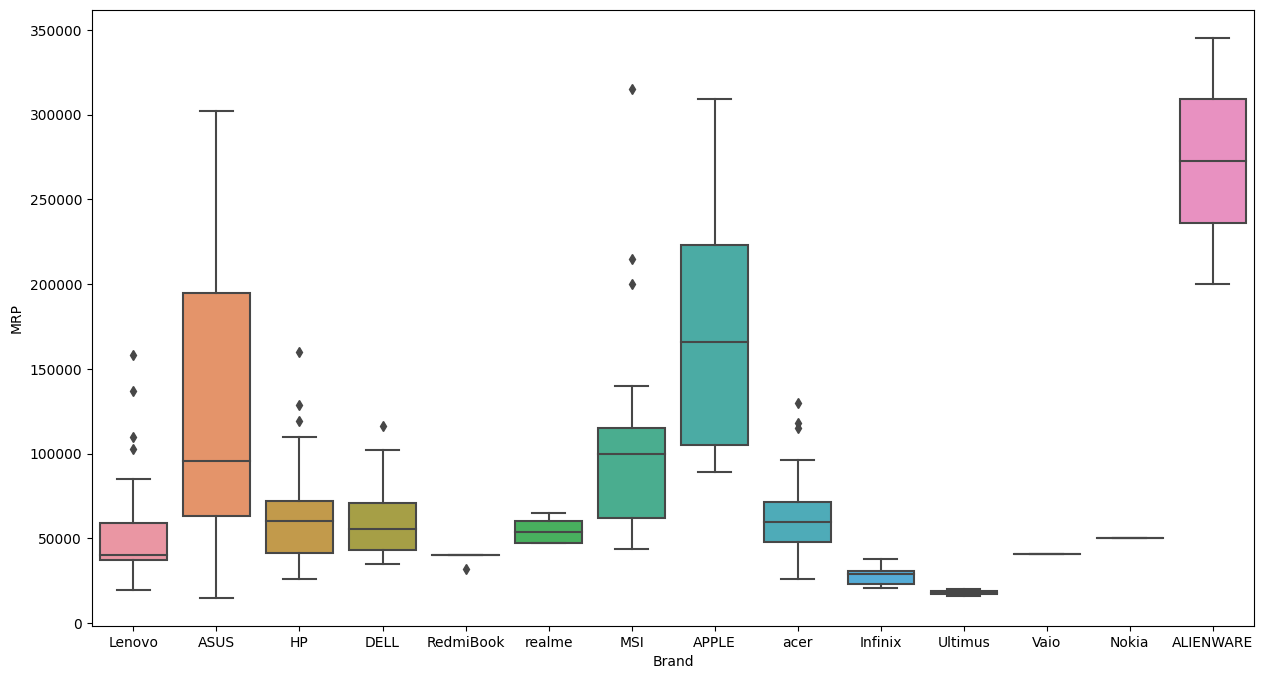

In [53]:
import seaborn as sn
from matplotlib import pyplot as plt

#RELATION BETWEEN MRP AND BRAND 
plt.figure(figsize=(15,8))
sn.boxplot(x='Brand',y='MRP',data=df)

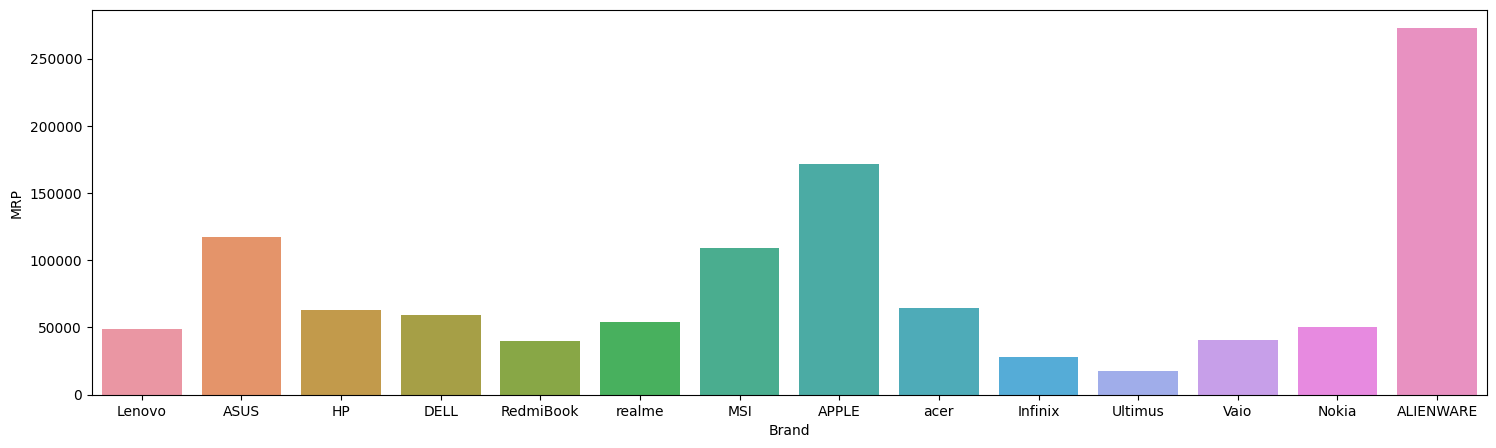

In [54]:
#relation between brand and mrp
plt.figure(figsize=(18,5))
sn.barplot(data=df, x="Brand", y="MRP", ci=None);

For alienware MRP IS HIGH COMPARED TO OTHER BRANDS

<Axes: >

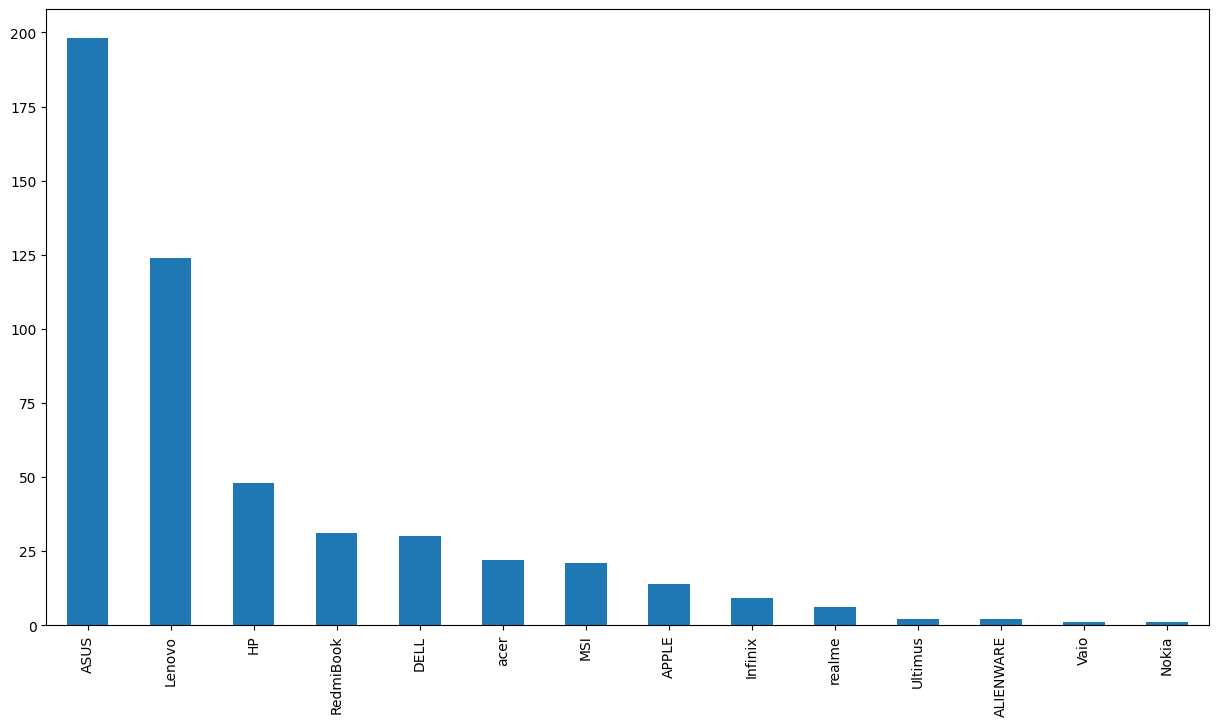

In [55]:
#COUNT NO OF LAPTOPS FOR EACH BRAND
df['Brand'].value_counts().plot(kind='bar',figsize=(15,8))

ASUS LAPTOPS ARE HIGH IN FLIPKART WEBSITE 

In [56]:
#FOR EACH BRAND OBSERVING MIN,MAX AND MEAN VALUE
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
              min     max           mean
Brand                                   
ALIENWARE  199990  345390  272690.000000
APPLE       88990  309490  171597.142857
ASUS        14990  301990  117500.550505
DELL        34990  116490   59610.766667
HP          25990  159990   62941.520833
Infinix     20990   37990   28323.333333
Lenovo      19490  157990   49054.862903
MSI         43990  314990  109100.428571
Nokia       50490   50490   50490.000000
RedmiBook   31990   39990   39731.935484
Ultimus     15990   19990   17990.000000
Vaio        40990   40990   40990.000000
acer        25990  129999   64756.636364
realme      46990   64999   54324.833333

<Axes: >

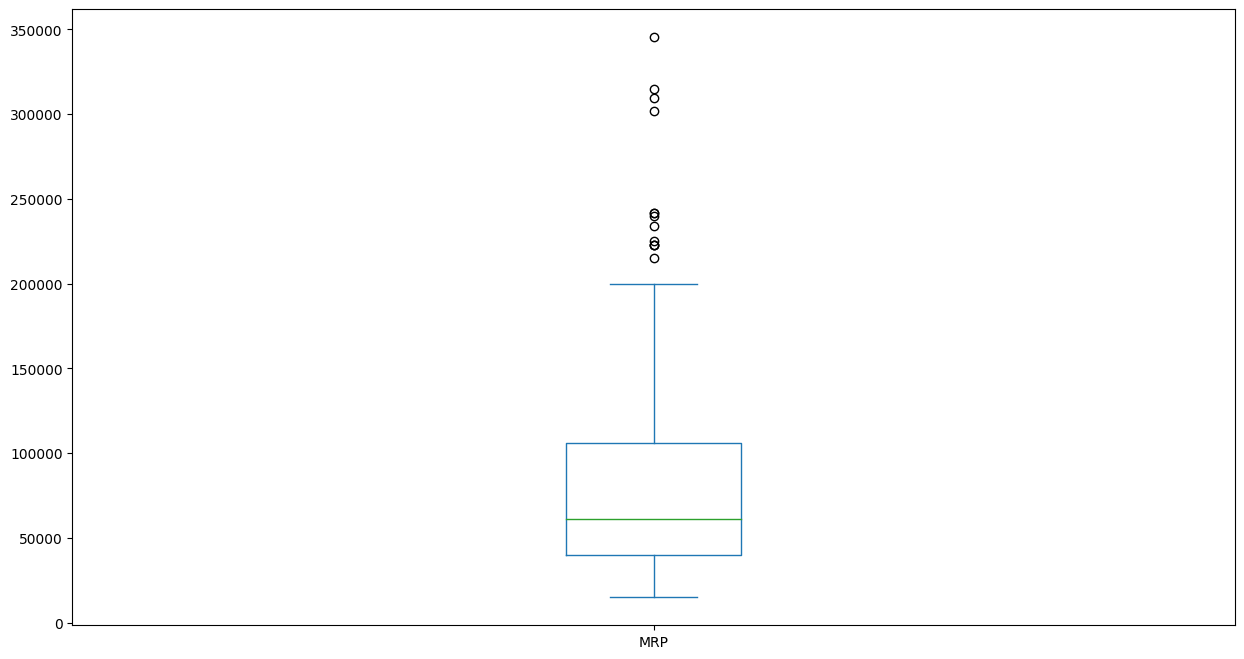

In [57]:
#PRICE RANGE
df['MRP'].plot(kind='box',figsize=(15,8))

THE HIGHEST PRICE OF A LAPTOP IS MORE THAN 4LAKHS AND MOST OF THE LAPTOPS ARE IN BELOW 1 LAKHS

#### OS VS MRP

<Axes: xlabel='OS', ylabel='MRP'>

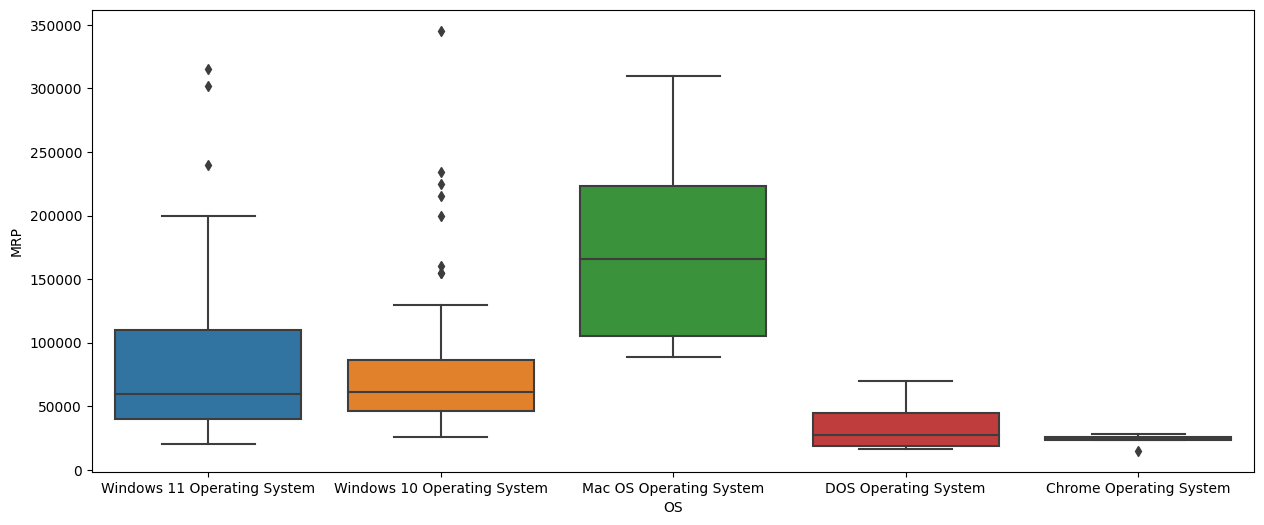

In [58]:
plt.figure(figsize=(15,6))
sn.boxplot(x='OS',y='MRP',data=df)

FOR MAC OS THE PRICE IS VERY HIGH

#### Processor vs MRP

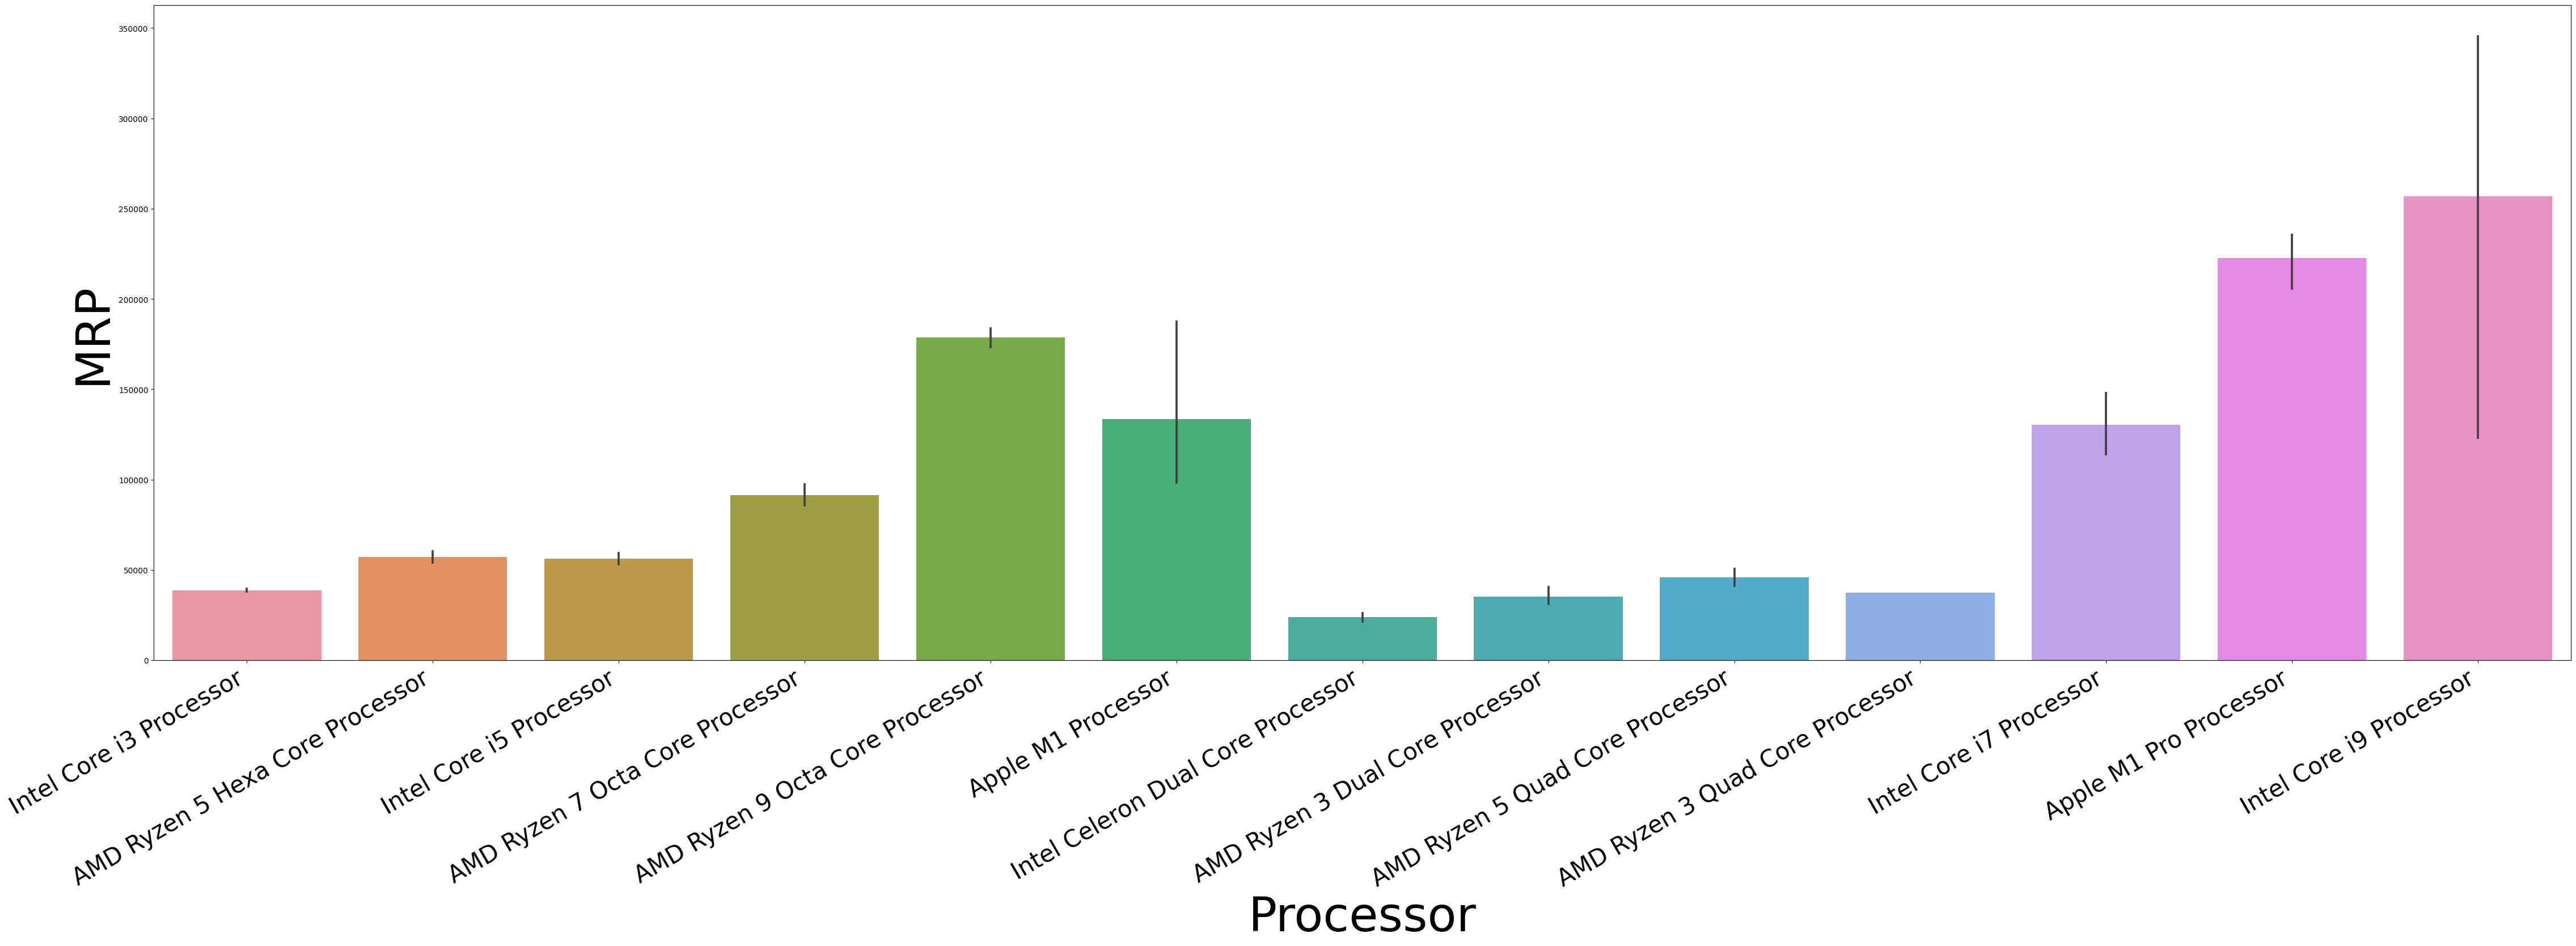

In [59]:
plt.figure(figsize=(55,15))
ax=sn.barplot(x='Processor',y='MRP',data=df)
ax.set_xlabel('Processor', fontsize=60)
ax.set_ylabel('MRP', fontsize=60)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, rotation=30, ha='right', va='top')
plt.show()

The price is very high for intel core i9 processor and followed by Apple m1 pro processor

#### RAM TYPE VS MRP

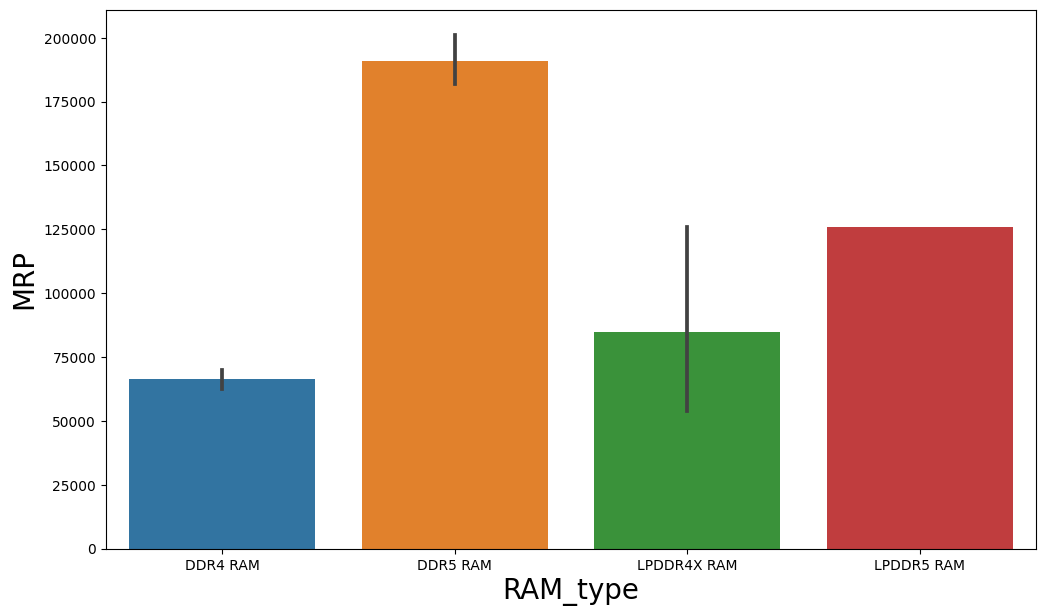

In [60]:
plt.figure(figsize=(12,7))
ax=sn.barplot(x='RAM_type',y='MRP',data=df)
ax.set_xlabel('RAM_type', fontsize=20)
ax.set_ylabel('MRP', fontsize=20)
plt.show()

DDR5 ram has higher price than other types

### Feature Engineering

In [61]:
df.columns

Index(['MRP', 'Processor', 'OS', 'Storage', 'Brand', 'RAM_SIZE', 'RAM_type',
       'Display_Size'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 719
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MRP           509 non-null    int64  
 1   Processor     509 non-null    object 
 2   OS            509 non-null    object 
 3   Storage       509 non-null    object 
 4   Brand         509 non-null    object 
 5   RAM_SIZE      509 non-null    object 
 6   RAM_type      509 non-null    object 
 7   Display_Size  509 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 35.8+ KB


MODEL TRAINING 

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [64]:
## split the data
x=df.drop("MRP", axis=1)
y=df["MRP"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
## Encoding categorical cols and standardize numerical col

cat_cols = ['Processor', 'OS', 'Storage', 'Brand','RAM_SIZE', 'RAM_type']
num_cols = ['Display_Size']

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols)
)

# Fit and transform training data
X_train_prep = preprocessor.fit_transform(x_train)

# transform test data
X_test_prep = preprocessor.transform(x_test)

In [66]:
## Linear regression Model

lr_model = LinearRegression()
lr_model.fit(X_train_prep, y_train)
y_pred=lr_model.predict(X_test_prep)

In [67]:
## Accuracy 

from sklearn.metrics import r2_score
lr_model.score(X_test_prep,y_test)

0.9357733645525178

RANDOM FOREST REGRESSOR

In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_prep, y_train)
y_pred=rf.predict(X_test_prep)

In [69]:
rf.score(X_test_prep,y_test)

0.9285020472209926

ACTUAL VS PREDICTION

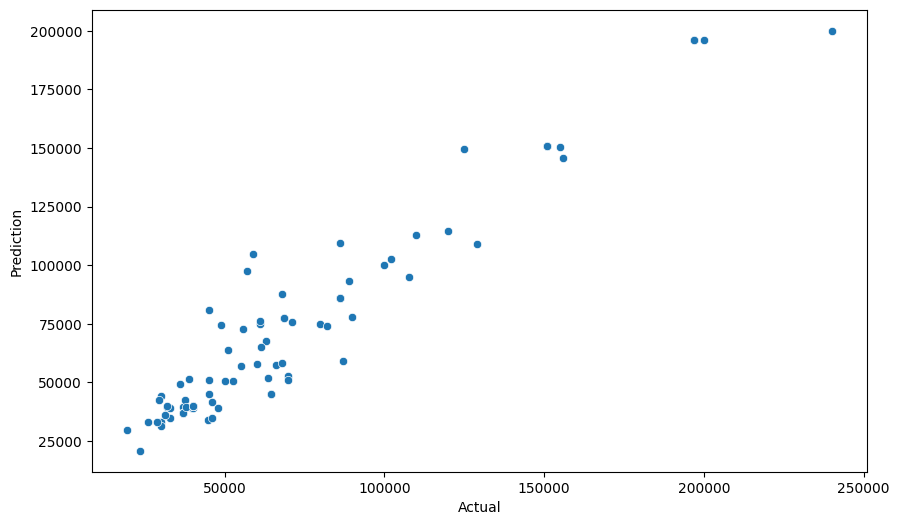

In [70]:
fig = plt.figure(figsize=(10,6))

sn.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()